<font size=7 color="blue">  Physics Modeling </font>

<br>
<hr>

<di>
   <img src="pbdl_overview.jpg" width="800"/>
</div>

<hr>

<font size=6 color="blue">  Physics Based Deep Learning </font>

* ### Differentiable physics
* ### Physics-Informed Neural Networks (PINNs)

<center>
<hr>
<di>
   <img src="diff_physics_p.png" width="500"/>
</div>

<hr>
</center>

<center>
<hr>
<font size=6 color="black">  Backward Physics </font>
<br>
<br>
<div>
   <img src="diff_throw1.jpg" width="550"/>
</div>

<hr>
</center>

## Module (Python): Differentiable Physics

* ### Numpy

* ### Matplotlib

* ### Pygame [**https://www.pygame.org**](https://www.pygame.org/news)


* ### PyTorch [**https://pytorch.org**](https://pytorch.org/docs/stable/index.html)

* ### TensorFlow [**https://www.tensorflow.org**](https://www.tensorflow.org/overview?hl=id)

* ### Jax [**https://jax.readthedocs.io**](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html)

<hr>

* ###  Φ-Flow [**https://github.com/tum-pbs/PhiFlow**](https://github.com/tum-pbs/PhiFlow)

<hr>

* ###  Taichi [**https://docs.taichi-lang.org**](https://docs.taichi-lang.org/docs/differentiable_programming)

<hr>

In [1]:
# from phi.tf.flow import *
from phi.torch.flow import *
# from phi.jax.stax.flow import *

ModuleNotFoundError: No module named 'phi'

# Tensor and Automatic Spatial Gradient

In [2]:
data = math.tensor(numpy.array([1, 2, 3, 4]), batch('dim1'))
print(f"{data:full}")

 1, 2, 3, 4


In [267]:
data = math.tensor(numpy.array([1, 2, 3, 4]), spatial('x'))
print(f"{data:full}")

1, 2, 3, 4  along (xˢ=4)


In [3]:
data = math.tensor(numpy.array([[1, 2, 3, 4], [5, 6, 7, 8]]), batch('dim1','dim2'))
print(f"{data:full}")

[[1, 2, 3, 4],
 [5, 6, 7, 8]]


In [4]:
data.dim1[0].dim2[1]

int64 2

In [5]:
data = math.tensor(numpy.linspace(0, 1, 101), batch('dim4'))
print(f"{data:full}")

 0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  


In [6]:
data.dim4

NativeTensor.dim4ᵇ=101

In [7]:
data = math.tensor(numpy.random.random(10), batch(dim2=10))

print(f"{data:full}")

 0.99701846, 0.42816067, 0.1072851 , 0.67417735, 0.91164887, 0.15588927, 0.30472717, 0.01767568, 0.44393113, 0.30450028


In [8]:
grid = math.ones(spatial(x=4, y=5, z=3))
grid

(xˢ=4, yˢ=5, zˢ=3) const 1.0

In [274]:
grid_grad = math.spatial_gradient(grid)
grid_grad

(xˢ=4, yˢ=5, zˢ=3, gradientᶜ=x,y,z) const 0.0

# Contoh 1: Fungsi Sinus


* Kita buat jaringan NN dengan **Densely Connected Convolutional Networks (DenseNet)**


In [9]:
net = dense_net(1, 1, [32, 32])
net

DenseNet(
  (linear0): Linear(in_features=1, out_features=32, bias=True)
  (linear1): Linear(in_features=32, out_features=32, bias=True)
  (linear_out): Linear(in_features=32, out_features=1, bias=True)
)

In [10]:
parameter_count(net)

1153


* Optimasi jaringan dengan Adaptive Moment Estimation (ADAM)


In [11]:
optimizer = adam(net)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-07
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [278]:
x = lambda a : math.sin(a)
print(x(PI/2))

1.0


In [279]:
y = lambda x: math.native_call(net, x)
print(y)

<function <lambda> at 0x13d97a040>


<Figure size 864x360 with 1 Axes>

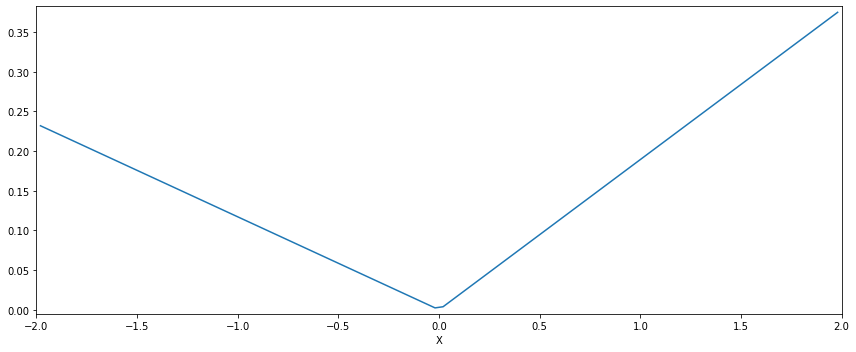

In [280]:
vis.plot(CenteredGrid(lambda x: math.native_call(net, x), x=100, bounds=Box(x=(-2,2))))

<Figure size 864x360 with 1 Axes>

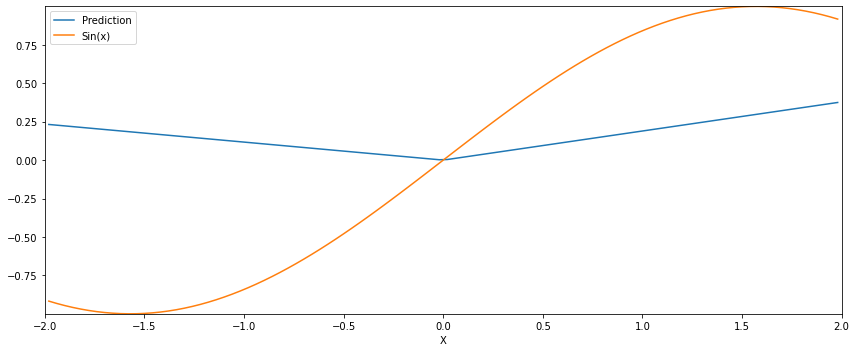

In [281]:
vis.plot(CenteredGrid(lambda x: math.stack(
    {"Prediction": math.native_call(net, x), 
     "Sin(x)": math.sin(x.vector['x']) }, 
    channel('curve')), 
    x=100, bounds=Box(x=(-2,2))))

### L2 Loss
L2 Loss, juga dikenal sebagai Mean Squared Error (MSE) dalam konteks regresi atau Euclidean Loss dalam berbagai aplikasi, adalah sebagai berikut:

$$ L2\_Loss = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2$$

Jika kita memiliki sejumlah $N$ data pasangan (x, y), di mana $x$ adalah data input dan $y$ adalah target atau label yang sebenarnya, maka L2 Loss dihitung sebagai rata-rata kuadrat perbedaan antara prediksi model $\hat{y}$ dan label sebenarnya $y$.



In [282]:
# @math.jit_compile
def loss_function(x):
  prediction = math.native_call(net, x)
  return math.l2_loss(prediction - math.sin(x)), x, prediction

In [283]:
loss_function(math.random_normal(batch(examples=100)))

((examplesᵇ=100) 0.216 ± 0.203 (1e-05...7e-01),
 (examplesᵇ=100) -0.052 ± 1.129 (-3e+00...3e+00),
 (examplesᵇ=100) 0.138 ± 0.105 (7e-03...5e-01))

In [284]:
loss_function(math.random_normal(batch(examples=100)))[0]

(examplesᵇ=100) 0.206 ± 0.209 (7e-07...7e-01)

In [285]:
loss_function(math.random_normal(batch(examples=100)))[1]

(examplesᵇ=100) 0.058 ± 1.127 (-3e+00...2e+00)

In [286]:
loss_function(math.random_normal(batch(examples=100)))[2]

(examplesᵇ=100) 0.140 ± 0.105 (2e-03...6e-01)

In [287]:
print(f"{loss_function(math.random_normal(batch(examples=100)))[1]:full}")

 -0.01991778, -0.3494694 , -0.84599996,  0.64123863,  0.6941028 ,  1.1129292 ,  1.8466241 , -0.03247464, -1.0245401 , -0.50790924,  2.0903594 ,  0.70467645,  0.38970312,  0.9289413 ,  0.94329077, -0.4956966 , -0.02533253,  0.96843666,  1.78628   , -0.20444153, -0.2176805 ,  1.888415  , -1.2161629 , -0.5081924 ,  1.193437  ,  1.3562826 , -0.8962257 ,  1.672435  ,  0.38231102, -0.07610504, -1.1366812 , -2.1704514 , -0.8387925 , -0.7339025 ,  0.43162978, -0.6215722 ,  1.1171668 , -1.6152656 , -0.9161727 , -2.6545522 ,  0.24731609,  0.01987226,  0.404139  ,  0.40744722,  0.57516325,  1.5875995 , -1.7094264 , -1.4580005 , -0.01458488, -1.0659585 , -1.2952707 , -0.05936924,  0.33039212, -0.52661014, -1.1229827 ,  0.10210951, -0.10092133,  2.4829607 , -1.0035162 ,  0.06236804, -1.8051431 , -0.29128474, -1.8399113 , -0.17535162,  0.4965633 ,  0.07864401,  0.0366822 , -0.98087496, -0.16521648, -1.0761137 ,  0.49745515, -0.89226544, -0.8279793 , -0.63659996, -0.33559453,  0.85221523, -1.8751992 

In [288]:
print(f"{math.random_normal(batch(examples=100)):full}")

 -1.4018328 ,  0.50741816, -1.0692809 , -0.85255337,  0.81085205,  1.1360325 , -0.08925319, -0.6524041 , -0.7420655 , -0.3806256 , -1.2023935 , -0.7532047 ,  0.14556603,  0.07931792,  1.5482266 ,  0.5174304 ,  1.7381473 , -0.2956508 , -0.01200387, -0.5660591 ,  1.0510417 ,  0.34920633,  1.1078948 , -1.2407464 , -0.30112132,  0.437507  , -0.3095294 , -0.48822284,  1.1198876 , -0.5491894 , -0.8695202 ,  0.8676704 ,  0.4870471 , -0.11895584, -1.4796793 ,  1.6307596 , -1.405008  ,  0.8489574 ,  0.33456692, -0.9906604 , -0.0872436 ,  0.22008044, -1.0309712 , -0.6808512 ,  0.35092372,  0.65658605, -1.7816544 ,  0.04347197,  1.1790763 ,  0.83535933, -0.42777058, -0.6539786 ,  1.4752283 , -0.05521214,  0.4739008 , -0.15223883, -0.26700905, -1.6955671 ,  0.54559344, -0.88921726,  0.05621807, -0.44411504, -1.3607686 ,  0.33461496, -0.99904203,  0.6889639 , -1.0246133 , -2.0476034 ,  0.01739112, -0.72583354,  0.5273829 , -0.32363692, -0.64549834, -0.33454958,  0.21892488,  0.7162865 ,  0.67391086

### Pembaruan Bobot (update_weights)

Bobot jaringan diperbarui berdasarkan hasil hitungan gradien dan algoritma optimisasi yang digunakan. 
Pembaruan ini dilakukan untuk meminimalkan fungsi kerugian (loss function) dan meningkatkan kinerja jaringan pada data pelatihan.

In [289]:
update_weights(net, optimizer, loss_function, math.random_normal(batch(examples=100)))

((examplesᵇ=100) 0.190 ± 0.191 (2e-08...7e-01),
 (examplesᵇ=100) 0.006 ± 1.057 (-3e+00...3e+00),
 (examplesᵇ=100) 0.127 ± 0.103 (2e-05...5e-01))

In [290]:
for i in range(1000):
  loss, _, _ = update_weights( net, optimizer, loss_function, math.random_normal(batch(examples=100)))
  if i % 100 == 0:
    print(loss)

(examplesᵇ=100) 0.192 ± 0.197 (7e-05...7e-01)
(examplesᵇ=100) 0.011 ± 0.013 (1e-05...8e-02)
(examplesᵇ=100) 0.009 ± 0.025 (3e-06...2e-01)
(examplesᵇ=100) 0.007 ± 0.013 (6e-07...1e-01)
(examplesᵇ=100) 0.007 ± 0.041 (1e-07...4e-01)
(examplesᵇ=100) 0.003 ± 0.010 (3e-08...8e-02)
(examplesᵇ=100) 0.009 ± 0.047 (5e-09...3e-01)
(examplesᵇ=100) 0.003 ± 0.019 (9e-10...2e-01)
(examplesᵇ=100) 0.004 ± 0.034 (1e-08...3e-01)
(examplesᵇ=100) 0.004 ± 0.033 (6e-09...3e-01)


<Figure size 864x360 with 1 Axes>

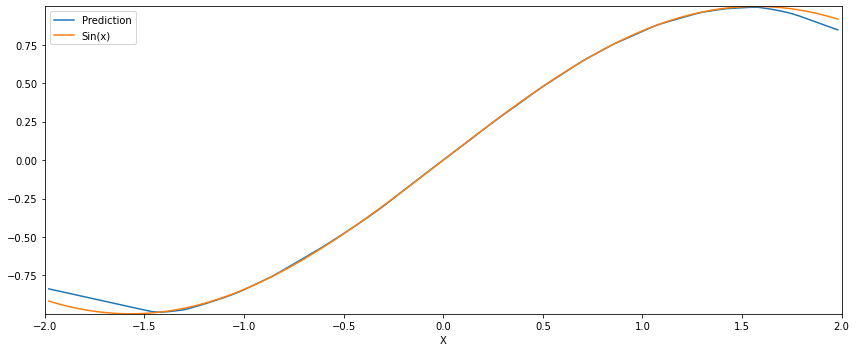

In [291]:
vis.plot(CenteredGrid(lambda x: math.stack(
    {"Prediction": math.native_call(net, x), 
     "Sin(x)": math.sin(x.vector['x']) }, 
     channel('curve')), 
    x=100, bounds=Box(x=(-2,2))))

In [1]:
# from phi.tf.flow import *
from phi.torch.flow import *
# from phi.jax.stax.flow import *

# Contoh 2:

## Projectile Motion 

* Traning dengan **fully-connected neural network**  untuk menyelesaikan masalah gerak peluru secara invers.
* Penerapan **Differentiable physics training**, termasuk secara numerik dan visualisasinya. 
<hr>
* Projectile motion: benda dilemparkan dengan **inisial posisi, ketinggian, kecepatan dan sudut elevasi**.
* Asumsikan benda mengikuti gerak parabola dengan tanpa hambatan udara

<center>
<di>
   <img src="peluru_h.png" width="400"/>
</div>
</center>
$$ v_{0x} = v_0 \cos(\theta)$$
$$ v_{0y} = v_0 \sin(\theta)$$

$$ v_x = v_{0x}$$
$$ x = v_{0x}t$$

$$ v_y = v_{0y} -gt$$

$$ y = h + v_{0y}t - \tfrac{1}{2}gt^2$$

Waktu hingga mencapai target di tanah $(x,0)$ :

$$ t_{hit} = \left (v_{0y} + \sqrt{v_{0y}^2 + 2gh} \right )/g$$


In [23]:
def simulate_hit(x_pos, h, v, theta, g=1.):
    v_x, v_y = math.cos(theta) * v, math.sin(theta) * v
    h = math.maximum(h, .5)
    hit_time = (v_y + math.sqrt(v_y**2 + 2 * g * h)) / g
    return x_pos + v_x * hit_time, hit_time, h, v_x, v_y

np.round(simulate_hit(x_pos=tensor(10), h=1, v=1, theta=0)[1], 3)

1.414

In [4]:
np.round(simulate_hit(x_pos=tensor(10), h=1, v=1, theta=PI/4)[1], 3)

0.529

#### Grafik lintasan peluru dengan nilai awal $x=10$, $h=1$, $v=1$ dan $\theta=\pi/4$

In [24]:
def sample_trajectory(x_pos, h, v, theta, g=1.):
    hit, hit_time, h, v_x, v_y = simulate_hit(x_pos, h, v, theta, g)
    t = math.linspace(0, hit_time, spatial(t=100))
    return vec(x=x_pos + v_x * t, y=h + v_y * t - g / 2 * t ** 2)

<Figure size 864x360 with 1 Axes>

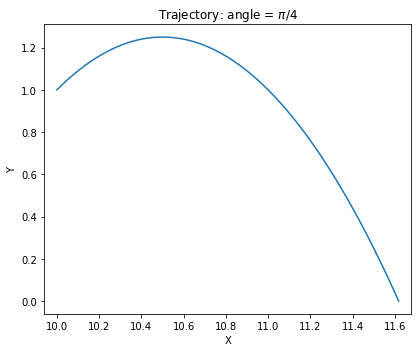

In [25]:
vis.plot(sample_trajectory(x_pos=tensor(10), h=1, v=1, theta=PI/4), title="Trajectory: angle = $\pi/4$")

### Grafik lintasan dengan mevariasikan sudut $\theta$

In [297]:
math.linspace(-PI/4, 1.5, channel(theta=7))

(-0.785, -0.404, -0.024, 0.357, 0.738, 1.119, 1.500) along thetaᶜ

In [298]:
np.linspace(-PI/4, 1.5, 7)

array([-0.78539816, -0.40449847, -0.02359878,  0.35730092,  0.73820061,
        1.11910031,  1.5       ])

<Figure size 864x360 with 1 Axes>

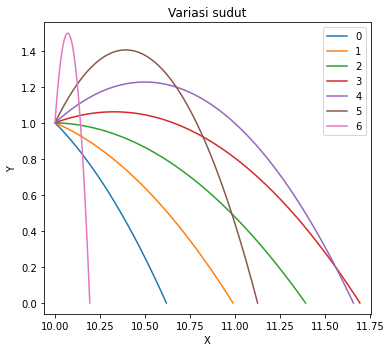

In [26]:
vis.plot(sample_trajectory(tensor(10), 1, 1, math.linspace(-PI/4, 1.5, channel(theta=7))), title="Variasi sudut")

<Figure size 864x360 with 1 Axes>

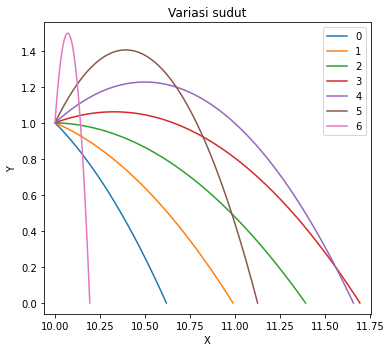

In [53]:
vis.plot(sample_trajectory(10, 1, 1, math.linspace(-PI/4, 1.5, channel(theta=7))), title="Variasi sudut")

#### Kita gunakan optimasi dengan **pengurangan gradient** pada kecepatan awal $v$.
* Mendefinisikan **loss function** untuk dioptimalisasikan dengan target atau kita ingin benda supaya mengenai titik pada $x=0$.
* Hitung automatic gradient untuk $v$.
* Iterasi perhitungan di atas hingga konvergen (10x), lalu simpan $v$.
* Plot grafik lintasanya per iterasi berdasarkan $v$ tersebut.

In [52]:
v = tensor(1)
def loss_function(v):
  return math.l2_loss( simulate_hit(10, 1, v, 0)[0] - 0.0) # target x=0.0

loss_function(v)

65.14213

In [49]:
v = tensor(1)
gradient = math.functional_gradient(loss_function, get_output=True)
gradient(v)

(65.14213, [16.142136])

In [50]:
v = tensor(1)
trj = [v] # list of velocity
for i in range(15):
    loss, (grad,) = gradient(v)
    v = v - .2 * grad
    trj.append(v)
    print(f"vel={v} - loss={loss}")
trj = math.stack(trj, channel('opt'))

vel=-2.2284272 - loss=65.14213
vel=-4.1654835 - loss=23.451168
vel=-5.3277173 - loss=8.442421
vel=-6.0250573 - loss=3.0392709
vel=-6.4434614 - loss=1.0941381
vel=-6.694504 - loss=0.39388976
vel=-6.8451295 - loss=0.14180061
vel=-6.935505 - loss=0.051048037
vel=-6.9897304 - loss=0.018377367
vel=-7.0222654 - loss=0.0066157645
vel=-7.0417867 - loss=0.0023817015
vel=-7.053499 - loss=0.00085737306
vel=-7.060527 - loss=0.00030866376
vel=-7.064743 - loss=0.00011110758
vel=-7.067273 - loss=4.000214e-05


<Figure size 864x360 with 1 Axes>

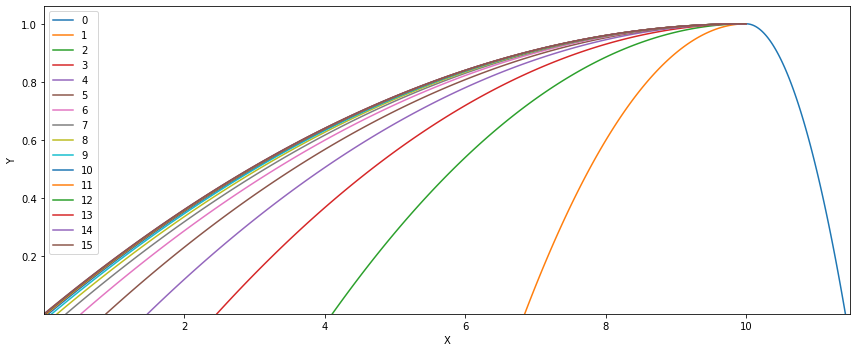

In [51]:
trj = math.stack(trj, channel('opt'))

vis.plot(sample_trajectory(x_pos=tensor(10), h=1, v=trj, theta=0))

Kita cukup mengurangi gradien dikalikan **learning rate** $\eta = 0,2$ hingga konvergen.

#### Kita buat <i> data set</i> untuk <i>training dan test</i> dengan sampling secara random.

In [54]:
def generate_data(shape):
  pos = math.random_normal(shape)
  h = math.random_uniform(shape) + .5
  v = math.random_uniform(shape)
  theta = math.random_uniform(shape) * PI/2
  return math.stack(dict(pos=pos, h=h, v=v, theta=theta), channel('vector'))

x_train = generate_data(batch(examples=1000))
x_test = generate_data(batch(examples=1000))

In [55]:
x_train

(examplesᵇ=1000, vectorᶜ=pos,h,v,theta) 0.565 ± 0.693 (-3e+00...3e+00)

In [56]:
y_train = simulate_hit(*x_train.vector)[0] # hanya diambil array posisi saja [0]
y_test = simulate_hit(*x_test.vector)[0]

In [57]:
y_train

(examplesᵇ=1000) 0.579 ± 1.103 (-3e+00...4e+00)

In [58]:
y_test

(examplesᵇ=1000) 0.519 ± 1.092 (-3e+00...4e+00)

* Kita buat jaringan NN dengan spesifikasi: **fully-connected neural network with three hidden layers**. 
* Kita reset `seed` untuk membuat inisialisasi dapat diprediksi untuk proses **differentiable physics**.


In [59]:
math.seed(0)
net_dp = dense_net(1, 4, [32, 64, 32])
net_dp

DenseNet(
  (linear0): Linear(in_features=1, out_features=32, bias=True)
  (linear1): Linear(in_features=32, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear_out): Linear(in_features=32, out_features=4, bias=True)
)

In [60]:
# net_sup.trainable_weights[0]  # TensorFlow
net_dp.state_dict()['linear0.weight'].flatten()  # PyTorch
# net_sup.parameters[0][0]  # Stax

tensor([-0.6542,  0.5716,  0.7903, -0.5744,  0.1061, -0.6293, -0.7108, -0.4710,
         0.0592, -0.3536,  0.5229, -0.2222, -0.7993, -0.1303,  0.8143, -0.6252,
        -0.7414,  0.3269,  0.8907,  0.8065, -0.1426,  0.3292,  0.0838,  0.5791,
        -0.0625,  0.8835, -0.2930, -0.7720,  0.8459, -0.5473, -0.4526, -0.8203])

In [61]:
net_dp.parameters

<bound method Module.parameters of DenseNet(
  (linear0): Linear(in_features=1, out_features=32, bias=True)
  (linear1): Linear(in_features=32, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear_out): Linear(in_features=32, out_features=4, bias=True)
)>

* We see that the networks were initialized identically! 
* Alternatively, we could have saved and loaded the state.

In [64]:
# @math.jit_compile
def physics_loss(y, net=net_dp):
  prediction = math.native_call(net, y)
  y_sim = simulate_hit(*prediction.vector)[0]
  return math.l2_loss(y_sim - y)

optimizer_dp = adam(net_dp)

for i in range(200):
#  update_weights(net_dp, opt_dp, physics_loss, y_train)
    loss = update_weights(net_dp, optimizer_dp, physics_loss, y_train)
    if i % 20 == 0:
        print(loss)

print(f"Diff.Phys. network (training set): {physics_loss(y_train, net=net_dp)}")
print(f"Diff.Phys. network (test set): {physics_loss(y_test, net=net_dp)}")

(examplesᵇ=1000) 5.13e-04 ± 1.3e-03 (1e-09...3e-02)
(examplesᵇ=1000) 5.96e-04 ± 1.8e-03 (1e-12...4e-02)
(examplesᵇ=1000) 7.51e-05 ± 1.1e-04 (3e-10...1e-03)
(examplesᵇ=1000) 3.58e-05 ± 5.6e-05 (8e-10...6e-04)
(examplesᵇ=1000) 1.71e-05 ± 6.1e-05 (6e-12...2e-03)
(examplesᵇ=1000) 1.32e-05 ± 6.4e-05 (4e-11...2e-03)
(examplesᵇ=1000) 1.04e-05 ± 5.2e-05 (3e-12...1e-03)
(examplesᵇ=1000) 8.20e-06 ± 4.5e-05 (6e-12...1e-03)
(examplesᵇ=1000) 6.64e-06 ± 3.6e-05 (1e-13...1e-03)
(examplesᵇ=1000) 5.50e-06 ± 3.0e-05 (3e-13...8e-04)
Diff.Phys. network (training set): (examplesᵇ=1000) 4.57e-06 ± 2.5e-05 (2e-12...7e-04)
Diff.Phys. network (test set): (examplesᵇ=1000) 1.12e-05 ± 2.1e-04 (6e-12...7e-03)


### Training with Differentiable Physics

* **Differentiable physics loss**: mensimulasikan lintasan berdasarkan kondisi awal yang diprediksi oleh jaringan.
* Kemudian kita dapat mengukur **seberapa dekat antara hasil dari network tersebut dengan lokasi yang diinginkan**.

* Hasilnya sangat bagus. <i>Differentiable physics network</i> lintasan akan mencapai lokasi yang diinginkan dengan sangat akurat, padahal hanya dilatih untuk **100 iterasi.**
* Dengan lebih banyak iterasi **training**, **loss** akan semakin berkurang.
* Differentiable physics network, sepenuhnya mengabaikan solusi **the ground truth** yang bahkan tidak diteruskan ke fungsi `physics_loss`. Sebaliknya, ia belajar untuk mencapai titik yang diinginkan dengan sangat tepat, sesuai yang kita inginkan.  

#### Visualisasikan beberapa lintasan terhadap Target (Ground Truth dan Diff.Phys).

Diff.Phys. network (training set): (examplesᵇ=1000) 4.57e-06 ± 2.5e-05 (2e-12...7e-04)
Diff.Phys. network (test set): (examplesᵇ=1000) 1.12e-05 ± 2.1e-04 (6e-12...7e-03)


<Figure size 1152x288 with 4 Axes>

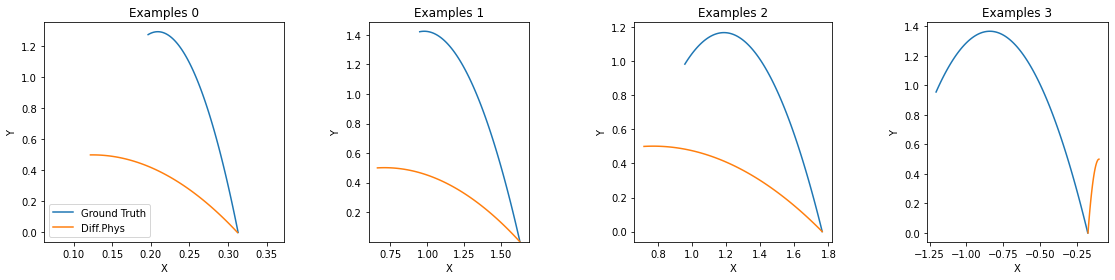

In [65]:
print(f"Diff.Phys. network (training set): {physics_loss(y_train, net=net_dp)}")
print(f"Diff.Phys. network (test set): {physics_loss(y_test, net=net_dp)}")

predictions = math.stack({
    "Ground Truth": x_test.examples[:4],
    "Diff.Phys": math.native_call(net_dp, y_test.examples[:4]),
}, channel('curves'))

vis.plot(sample_trajectory(*predictions.vector), size=(16, 4))

#### Nampak bahwa jaringan NN 'fisika terdiferensiasi (differentiable physics network)' sangat akurat dalam memprediksi **titik target** seperti yang diharapkan dari simulasi sebenarnya dengan optimalisai 'nilai kerugian (loss)'.


# Contoh 3

In [12]:
import taichi as ti
ti.init()

[Taichi] version 1.6.0, llvm 15.0.7, commit f1c6fbbd, osx, python 3.9.16
[Taichi] Starting on arch=arm64


In [13]:
N = 8
dt = 1e-5

x = ti.Vector.field(2, dtype=ti.f32, shape=N, needs_grad=True)  # particle positions
v = ti.Vector.field(2, dtype=ti.f32, shape=N)  # particle velocities
U = ti.field(dtype=ti.f32, shape=(), needs_grad=True)  # potential energy

In [14]:
@ti.kernel
def compute_U():
    for i, j in ti.ndrange(N, N):
        r = x[i] - x[j]
        # r.norm(1e-3) is equivalent to ti.sqrt(r.norm()**2 + 1e-3)
        # This is to prevent 1/0 error which can cause wrong derivative
        U[None] += -1 / r.norm(1e-3)  # U += -1 / |r|


In [15]:
@ti.kernel
def advance():
    for i in x:
        v[i] += dt * -x.grad[i]  # dv/dt = -dU/dx
    for i in x:
        x[i] += dt * v[i]  # dx/dt = v

In [16]:
def substep():
    with ti.ad.Tape(loss=U):
        # Kernel invocations in this scope will later contribute to partial derivatives of
        # U with respect to input variables such as x.
        compute_U(
        )  # The tape will automatically compute dU/dx and save the results in x.grad
    advance()

In [17]:
@ti.kernel
def init():
    for i in x:
        x[i] = [ti.random(), ti.random()]

In [19]:
init()
gui = ti.GUI('Autodiff gravity')
# gui = ti.ui.Window('Autodiff gravity', res=(400, 400))
while gui.running:
    for i in range(50):
        substep()
    gui.circles(x.to_numpy(), radius=3)
    gui.show()
gui.close()

# Contoh 4

In [20]:
import pygame
import math
import sys

pygame 2.5.2 (SDL 2.28.3, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [21]:
pygame.init()
WIDTH, HEIGHT =  800, 800
WIN = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Planet Simulation")

WHITE = (255, 255, 255)
YELLOW = (255, 255, 0)
BLUE = (100, 149, 237)
RED = (188, 39, 50)
DARK_GREY = (80, 78, 81)

FONT = pygame.font.SysFont("comicsans", 16)

In [23]:
# OOP
class Planet:
	AU = 149.6e6 * 1000
	G = 6.67428e-11
	SCALE = 250 / AU  # 1AU = 100 pixels
	TIMESTEP = 3600*24 # 1 day

	def __init__(self, x, y, radius, color, mass):
		self.x = x
		self.y = y
		self.radius = radius
		self.color = color
		self.mass = mass

		self.orbit = []
		self.sun = False
		self.distance_to_sun = 0

		self.x_vel = 0
		self.y_vel = 0

	def draw(self, win):
		x = self.x * self.SCALE + WIDTH / 2
		y = self.y * self.SCALE + HEIGHT / 2

		if len(self.orbit) > 2:
			updated_points = []
			for point in self.orbit:
				x, y = point
				x = x * self.SCALE + WIDTH / 2
				y = y * self.SCALE + HEIGHT / 2
				updated_points.append((x, y))

			pygame.draw.lines(win, self.color, False, updated_points, 2)

		pygame.draw.circle(win, self.color, (x, y), self.radius)
		
		if not self.sun:
			distance_text = FONT.render(f"{round(self.distance_to_sun/1000, 1)}km", 1, WHITE)
			win.blit(distance_text, (x - distance_text.get_width()/2, y - distance_text.get_height()/2))

	def attraction(self, other):
		other_x, other_y = other.x, other.y
		distance_x = other_x - self.x
		distance_y = other_y - self.y
		distance = math.sqrt(distance_x ** 2 + distance_y ** 2)

		if other.sun:
			self.distance_to_sun = distance

		force = self.G * self.mass * other.mass / distance**2
		theta = math.atan2(distance_y, distance_x)
		force_x = math.cos(theta) * force
		force_y = math.sin(theta) * force
		return force_x, force_y

	def update_position(self, planets):
		total_fx = total_fy = 0
		for planet in planets:
			if self == planet:
				continue

			fx, fy = self.attraction(planet)
			total_fx += fx
			total_fy += fy

        # Euler Methode
		self.x_vel += total_fx / self.mass * self.TIMESTEP
		self.y_vel += total_fy / self.mass * self.TIMESTEP

		self.x += self.x_vel * self.TIMESTEP
		self.y += self.y_vel * self.TIMESTEP
		self.orbit.append((self.x, self.y))

In [24]:
def main():
    run = True
    clock = pygame.time.Clock()

    sun = Planet(0, 0, 30, YELLOW, 1.98892 * 10 ** 30)
    sun.sun = True

    earth = Planet(-1 * Planet.AU, 0, 16, BLUE, 5.9742 * 10 ** 24)
    earth.y_vel = 29.783 * 1000

    mars = Planet(-1.524 * Planet.AU, 0, 12, RED, 6.39 * 10 ** 23)
    mars.y_vel = 24.077 * 1000

    mercury = Planet(0.387 * Planet.AU, 0, 8, DARK_GREY, 3.30 * 10 ** 23)
    mercury.y_vel = -47.4 * 1000

    venus = Planet(0.723 * Planet.AU, 0, 14, WHITE, 4.8685 * 10 ** 24)
    venus.y_vel = -35.02 * 1000

    planets = [sun, earth, mars, mercury, venus]

    while run:
        clock.tick(60)
        WIN.fill((0, 0, 0))

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

        for planet in planets:
            planet.update_position(planets)
            planet.draw(WIN)

        pygame.display.update()

    pygame.quit()
    sys.exit()

In [25]:
main()

SystemExit: 

/Users/macbook/miniconda3/envs/torch-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Contoh 5

### Gaya Lorentz: Gerak Muatan dalam Medan Listrik dan Magnet
##

<div>

   <img src="lorentz.png" width="400"/>

</div>

###

$$\textbf{F}= q\left [\textbf{E} + \left(\textbf{v} \times \textbf{B} \right) \right ]$$

dengan medan listrik $\textbf{E} = E_x \hat{x}+ E_y\hat{y}+ E_z\hat{z}$, kecepatan partikel $ \textbf{v} = v_x \hat{x}+ v_y\hat{y}$ dan medan magnet homogin $ \textbf{B} = B_z\hat{z}$, maka

$$\omega = \left (\frac{q}{m}\right) B_z $$

$$ a_x = \left(\frac{q}{m} \right) E_x + \omega \; v_y$$

$$ a_y = \left(\frac{q}{m} \right) E_y - \omega \; v_x$$

$$ a_z = \left (\frac{q}{m}\right) E_z $$

In [2]:
# for creating a responsive plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
import matplotlib.pylab as plt
import sympy as smp

In [3]:
t, q, m, Ex, Ey, Ez, Bz, omega = smp.symbols("t, q, m, E_x, E_y, E_z, B_z, omega", positive=True)
x = smp.Function("x")
y = smp.Function("y")
z = smp.Function("z")
omega = q/m*Bz
omega

B_z*q/m

In [4]:
ode_x = x(t).diff(t, 2) - omega * y(t).diff(t) - (q/m)*Ex
ode_x

-B_z*q*Derivative(y(t), t)/m - E_x*q/m + Derivative(x(t), (t, 2))

In [5]:
ode_y = y(t).diff(t, 2) + omega * x(t).diff(t) - (q/m)*Ey
ode_y

B_z*q*Derivative(x(t), t)/m - E_y*q/m + Derivative(y(t), (t, 2))

In [6]:
ode_z = z(t).diff(t, 2) - (q/m)*Ez
ode_z

-E_z*q/m + Derivative(z(t), (t, 2))

In [7]:
sol_ode_x = smp.dsolve(ode_x, x(t)) # solusi umum
sol_ode_x

Eq(x(t), C1 + E_x*q*t**2/m + t*(B_z*q*y(t)/m + C2) - q*Integral(t*(B_z*Derivative(y(t), t) + E_x), t)/m)

In [8]:
sol_ode_x_khusus = smp.dsolve(ode_x,x(t), ics={x(0): 0, x(t).diff(t).subs(t, 0): 1}) # solusi khusus
sol_ode_x_khusus

Eq(x(t), E_x*q*t**2/m + t*(B_z*q*y(t)/m + (-B_z*q*y(0) + m)/m) - q*Integral(t*(B_z*Derivative(y(t), t) + E_x), t)/m + (q*Integral(E_x*t, (t, 0)) + q*Integral(B_z*t*Derivative(y(t), t), (t, 0)))/m)

In [9]:
sol_ode_kopel_xy_khusus = smp.dsolve((ode_x, ode_y), [x(t),y(t)], ics={x(0):0, y(0):0, x(t).diff(t).subs(t,0): 1, y(t).diff(t).subs(t, 0): 1})
sol_ode_kopel_xy_khusus

[Eq(x(t), E_y*t/B_z + m/(B_z*q) + E_x*m*sin(B_z*q*t/m)**2/(B_z**2*q) + E_x*m*cos(B_z*q*t/m)**2/(B_z**2*q) - m*(B_z + E_x)*cos(B_z*q*t/m)/(B_z**2*q) + m*(B_z - E_y)*sin(B_z*q*t/m)/(B_z**2*q)),
 Eq(y(t), -E_x*t/B_z - m/(B_z*q) + E_y*m*sin(B_z*q*t/m)**2/(B_z**2*q) + E_y*m*cos(B_z*q*t/m)**2/(B_z**2*q) + m*(B_z + E_x)*sin(B_z*q*t/m)/(B_z**2*q) + m*(B_z - E_y)*cos(B_z*q*t/m)/(B_z**2*q))]

In [10]:
xt = sol_ode_kopel_xy_khusus[0]
xt

Eq(x(t), E_y*t/B_z + m/(B_z*q) + E_x*m*sin(B_z*q*t/m)**2/(B_z**2*q) + E_x*m*cos(B_z*q*t/m)**2/(B_z**2*q) - m*(B_z + E_x)*cos(B_z*q*t/m)/(B_z**2*q) + m*(B_z - E_y)*sin(B_z*q*t/m)/(B_z**2*q))

In [11]:
yt = sol_ode_kopel_xy_khusus[1]
yt

Eq(y(t), -E_x*t/B_z - m/(B_z*q) + E_y*m*sin(B_z*q*t/m)**2/(B_z**2*q) + E_y*m*cos(B_z*q*t/m)**2/(B_z**2*q) + m*(B_z + E_x)*sin(B_z*q*t/m)/(B_z**2*q) + m*(B_z - E_y)*cos(B_z*q*t/m)/(B_z**2*q))

In [12]:
sol_ode_z_khusus = smp.dsolve(ode_z, z(t), ics = {z(0): 0, z(t).diff(t).subs(t, 0): 1})
sol_ode_z_khusus

Eq(z(t), E_z*q*t**2/(2*m) + t)

In [4]:
# for creating a responsive plot
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
import matplotlib.pylab as plt

In [5]:
def fxyz(t, vx, vy, vz, Ex, Ey, Ez, Bz, m, q):
    return [q*Ex + q*Bz*vy, q*Ey - q*Bz*vx, q*Ez]

In [6]:
def euler(t, x, y, z, vx, vy, vz, Ex, Ey, Ez, Bz, m, q):
    n = len(t)
    dt = t[1]-t[0]

    for i in range(n-1):
        ax = fxyz(t[i], vx[i], vy[i], vz[i+1], Ex, Ey, Ez, Bz, m, q)[0]/m        
        vx[i+1] = vx[i] + dt*ax
        ay = fxyz(t[i], vx[i+1], vy[i], vz[i], Ex, Ey, Ez, Bz, m, q)[1]/m
        vy[i+1] = vy[i] + dt*ay
        az = fxyz(t[i], vx[i], vy[i+1], vz[i], Ex, Ey, Ez, Bz, m, q)[2]/m
        vz[i+1] = vz[i] + dt*az
        x[i+1] = x[i] + dt*vx[i+1]
        y[i+1] = y[i] + dt*vy[i+1]
        z[i+1] = z[i] + dt*vz[i+1]    
    return x, y, z

In [7]:
t = np.linspace(0, 3.35e-8, 3351)
# tmax = 3.35e-8
t[3349]

3.3490000000000004e-08

In [8]:
n = len(t)
vx = np.zeros(n)
vy = np.zeros(n)
vz = np.zeros(n)
x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)

vx[0] = 1.0 # 1.0e6
vy[0] = 1.0
vz[0] = 1.0


x[0] = 0.0
y[0] = 0.0
z[0] = 0.0

Bz = 0.005
#Bz = 0.0
Ex = 0.0
# Ey = 1.0e4 # sikloid
Ey = 0.0
Ez = 0.0

# dt = 2.0e-11
q = 1.6e-19
m = 9.1e-31

In [9]:
# analitik
xa = Ey*t/Bz + m/(Bz*q) + Ex*m*np.sin(Bz*q*t/m)**2/(Bz**2*q) + Ex*m*np.cos(Bz*q*t/m)**2/(Bz**2*q) - m*(Bz + Ex)*np.cos(Bz*q*t/m)/(Bz**2*q) + m*(Bz - Ey)*np.sin(Bz*q*t/m)/(Bz**2*q)
ya = -Ex*t/Bz - m/(Bz*q) + Ey*m*np.sin(Bz*q*t/m)**2/(Bz**2*q) + Ey*m*np.cos(Bz*q*t/m)**2/(Bz**2*q) + m*(Bz + Ex)*np.sin(Bz*q*t/m)/(Bz**2*q) + m*(Bz - Ey)*np.cos(Bz*q*t/m)/(Bz**2*q)
za = (Ez*q/(2*m))*t**2 + t

In [10]:
# numerik Euler
x1, y1, z1 = euler(t, x, y, z, vx, vy, vz, Ex, Ey, Ez, Bz, m, q)

In [1]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1, c='b', label='Euler')
ax.plot(xa, ya, za, c='r', label='Analitik')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

NameError: name 'plt' is not defined

# Contoh Animasi

Animasi memerlukan kaitan waktu tampilan dengan frame animasi, sehingga harus menentukan jumlah frame per sekon.

* Berikut adalah gelombang sinus yang bergerak dengan kecepatan $v$ = 6 m/s. 

$$ y(x,t) = A \sin \left [ \tfrac{2\pi}{\lambda}(x - vt) \right ]$$

dengan amplitudo $A$ dan bilangan gelombang $ k = \tfrac{2\pi}{\lambda} $

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
plt.style.use(['science', 'notebook', 'grid'])

In [33]:
def f(x, t, k, v):
    return np.sin(k*(x-v*t))

x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
k = 1
v = 6
F = f(X, T, k, v)

In [24]:
60/60

1.0

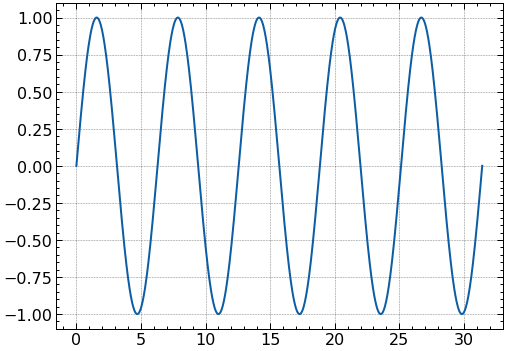

In [28]:
plt.plot(x, F[0])

In [34]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

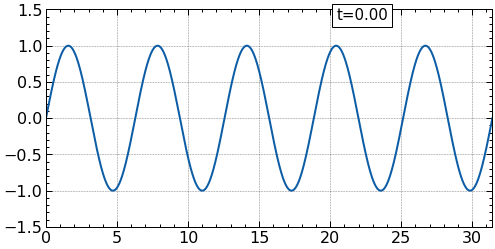

In [35]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('images/ani.gif',writer='pillow',fps=50,dpi=100)

In [13]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
x = xa
y = ya
z = za

In [ ]:
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot(x1, y1, z1, c='b', label='Euler')
ax.plot(x, y, z)

# ax.plot_surface(x,y,z, cmap='coolwarm',
#                       linewidth=0, antialiased=False)

# ax.plot(x,y,z)

ax.view_init(elev=30, azim=0, vertical_axis='z')

def animate(i):
    ax.view_init(elev=30, azim=3*i)
    
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('images/ani3.gif',writer='pillow',fps=30,dpi=100)

### Referensi

* Thuerey, N., Holl, P., Mueller, M., Schnell, P., Trost, F., & Um, K. (2021). [Physics-based deep learning](https://arxiv.org/abs/2109.05237). arXiv preprint arXiv:2109.05237.
* Chen, R. T., Rubanova, Y., Bettencourt, J., & Duvenaud, D. K. (2018). [Neural ordinary differential equations](https://proceedings.neurips.cc/paper_files/paper/2018/file/69386f6bb1dfed68692a24c8686939b9-Paper.pdf). Advances in neural information processing systems, 31.
* Liang, J., & Lin, M. C. (2020, February). [Differentiable physics simulation](https://openreview.net/forum?id=p-SG2KFY2). In ICLR 2020 Workshop on Integration of Deep Neural Models and Differential Equations.
* McNally, W., Lambeth, J., & Brekke, D. (2023). [Combining Physics and Deep Learning Models To Simulate the Flight of a Golf Ball](https://openaccess.thecvf.com/content/CVPR2023W/CVSports/html/McNally_Combining_Physics_and_Deep_Learning_Models_To_Simulate_the_Flight_CVPRW_2023_paper.html). In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 5118-5127).
* Hu, Y., Anderson, L., Li, T. M., Sun, Q., Carr, N., Ragan-Kelley, J., & Durand, F. (2019). [Difftaichi: Differentiable programming for physical simulation](https://arxiv.org/abs/1910.00935). arXiv preprint arXiv:1910.00935.
